In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [8]:
iris = pd.read_csv("iris.csv")
iris=np.array(iris)

In [16]:
sepal_length=[]
sepal_width=[]
petal_length=[]
petal_width=[]
for k in range (150):
    sepal_length += [iris[k, 0]]
    sepal_width += [iris[k, 1]]
    petal_length += [iris[k, 2]]
    petal_width += [iris[k, 3]]

In [17]:
def smallest_i (L) :
    #finds the index of the minimum in a given list
    i = 0
    for k in range (len(L)) :
        if L[k] < L[i] :
            i = k
    return (i)

def center_select(x, y, nb) :
    #randomly selects nb points that will become the first centroids
    x_selec = [0]*nb
    y_selec = [0]*nb
    for i in range (nb) :
        index = random.randint(0, len(x)-1)
        x_selec[i] = x[index]
        y_selec[i] = y[index]
    return(x_selec, y_selec)
    #returns two lists containing respectively the x and y coordinates or selected points


def affectation(x_points, y_points, x_selec, y_selec) :
    #takes in parameter the x and y of all the points, and the x and y of the centroids, and affects each point to a cluster

    nb = len(x_selec)     #number of clusters
    pts = len(x_points)   #total number of points

    #x_step0 and y_step0 are going to be lists of lists
    #they each contain nb lists (where nb is the number of clusters, so here, 3)
    #each list within contains the x (resp the y) of each point that has been affected to this cluster
    x_step0 = [0]*nb
    y_step0 = [0]*nb
    for i in range(nb):
        x_step0[i] = []
        y_step0[i] = []

    #for each point, we compute its distance to each centroid
    for i in range (pts) :
        distances = [0]*nb
        for k in range (nb) :
            distances[k] = math.sqrt((x_points[i]-x_selec[k])**2+(y_points[i]-y_selec[k])**2)
        cluster = smallest_i(distances)
        #and we affect it to the cluster which has the smallest distance point-centroid
        x_step0[cluster] += [x_points[i]]
        y_step0[cluster] += [y_points[i]]
    return(x_step0, y_step0)


def new_centroids(x_step0, y_step0):
    #this function computes the average value of the x and y of points in a cluster
    #and makes new centroids with the coordinates these average x and y

    nb = len(x_step0) #number of clusters
    #x_centroids and y_centroids will contain the coordinates of the new centroids
    x_centroids = [0]*nb
    y_centroids = [0]*nb

    for i in range (nb) :
        pts = len(x_step0[i]) #number of points in cluster i
        x = x_step0[i]
        y = y_step0[i]
        sum_x = 0 #initializing the sum of the x coords for cluster i
        sum_y = 0 #initializing the sum of the y coords for cluster i
        for k in range (pts) :
            sum_x += x[k]
            sum_y += y[k]
        x_centroids[i] = sum_x/pts
        y_centroids[i] = sum_y/pts
    return(x_centroids, y_centroids)

In [18]:
#change parameters easily here
nb_clusters = 3         #number of clusters
nb_loop = 50         #how many centroids are computed before stopping the algorithm
colors = ['#ef43aa', '#3083dc', '#ffad0a'] #just colors that look pretty together for the visualization

In [23]:
##Real distibution
sepal_length1=[]
sepal_width1=[]
petal_length1=[]
petal_width1=[]

sepal_length2=[]
sepal_width2=[]
petal_length2=[]
petal_width2=[]

sepal_length3=[]
sepal_width3=[]
petal_length3=[]
petal_width3=[]

for k in range (150):
    if iris[k, 4] == 'Setosa':
        sepal_length1 += [iris[k, 0]]
        sepal_width1 += [iris[k, 1]]
        petal_length1 += [iris[k, 2]]
        petal_width1 += [iris[k, 3]]
    elif iris[k, 4] == 'Versicolor':
        sepal_length2 += [iris[k, 0]]
        sepal_width2 += [iris[k, 1]]
        petal_length2 += [iris[k, 2]]
        petal_width2 += [iris[k, 3]]
    elif iris[k, 4] == 'Virginica':
        sepal_length3 += [iris[k, 0]]
        sepal_width3 += [iris[k, 1]]
        petal_length3 += [iris[k, 2]]
        petal_width3 += [iris[k, 3]]


#uncomment this to show the graph of the distribution of sepals and petals respectively

#plt.scatter(sepal_length1, sepal_width1, color='red')
#plt.scatter(sepal_length2, sepal_width2, color='green')
#plt.scatter(sepal_length3, sepal_width3, color='blue')

#plt.scatter(petal_length1, petal_width1, color='red')
#plt.scatter(petal_length2, petal_width2, color='green')
#plt.scatter(petal_length3, petal_width3, color='blue')
#plt.show()

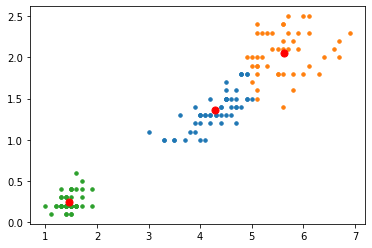

In [24]:
## Petals
x_petals = petal_length
y_petals = petal_width

centroids_step0_p = center_select(x_petals, y_petals, nb_clusters)    #selects 3 random points in the dataset to become centroids
x_centroids_step0_p = centroids_step0_p[0]
y_centroids_step0_p = centroids_step0_p[1]


for k in range (nb_loop) :
    clusters_p = affectation(x_petals, y_petals, x_centroids_step0_p, y_centroids_step0_p) #affects points to centroids according to their distance to each centroid
    x_clusters_p = clusters_p[0]
    y_clusters_p = clusters_p[1]

    centroids_step1_p = new_centroids(x_clusters_p, y_clusters_p)   #computes new centroids for each class
    x_centroids_step1_p = centroids_step1_p[0]
    y_centroids_step1_p = centroids_step1_p[1]

    x_centroids_step0_p = x_centroids_step1_p   #allows us to loop
    y_centroids_step0_p = y_centroids_step1_p


for i in range (nb_clusters) :
    plt.scatter(x_clusters_p[i], y_clusters_p[i], s=12) #show the clusters
plt.scatter(x_centroids_step1_p, y_centroids_step1_p, s=50, c='red') #shows the final centroids
plt.show()

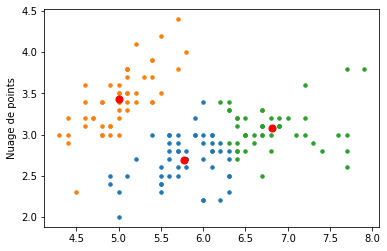

In [25]:
## Sepals

x_sepals = sepal_length
y_sepals = sepal_width

centroids_step0_s = center_select(x_sepals, y_sepals, nb_clusters)    #selects 3 random points in the dataset to become centroids
x_centroids_step0_s = centroids_step0_s[0]
y_centroids_step0_s = centroids_step0_s[1]


for k in range (nb_loop) :
    clusters_s = affectation(x_sepals, y_sepals, x_centroids_step0_s, y_centroids_step0_s) #affects points to centroids according to their distance to each centroid
    x_clusters_s = clusters_s[0]
    y_clusters_s = clusters_s[1]

    centroids_step1_s = new_centroids(x_clusters_s, y_clusters_s)   #computes new centroids for each class
    x_centroids_step1_s = centroids_step1_s[0]
    y_centroids_step1_s = centroids_step1_s[1]

    x_centroids_step0_s = x_centroids_step1_s   #allows us to loop
    y_centroids_step0_s = y_centroids_step1_s


for i in range (nb_clusters) :
    plt.scatter(x_clusters_s[i], y_clusters_s[i], s=12) #shows the clusters
plt.scatter(x_centroids_step1_s, y_centroids_step1_s, s=50, c='red') #shows the final centroids
plt.ylabel('Nuage de points')
plt.show()


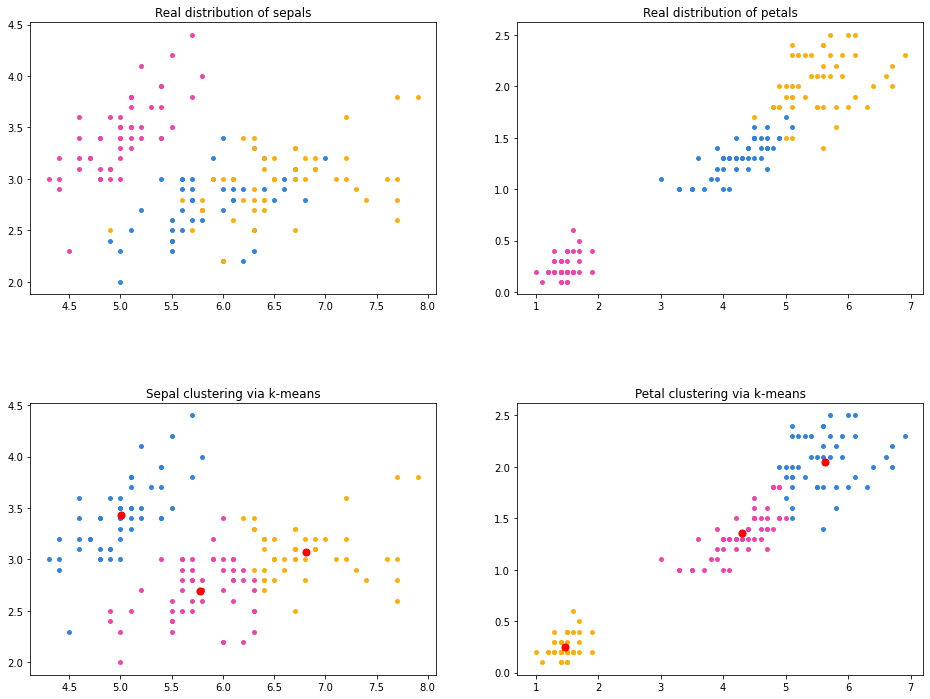

In [32]:
## Everything together

fig, axs = plt.subplots(2, 2, figsize=(16,12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

axs[0, 0].scatter(sepal_length1, sepal_width1, s=15, color= colors[0])
axs[0, 0].scatter(sepal_length2, sepal_width2, s=15, color= colors[1])
axs[0, 0].scatter(sepal_length3, sepal_width3, s=15, color= colors[2])
axs[0, 0].title.set_text('Real distribution of sepals')

axs[0, 1].scatter(petal_length1, petal_width1, s=15, color= colors[0])
axs[0, 1].scatter(petal_length2, petal_width2, s=15, color= colors[1])
axs[0, 1].scatter(petal_length3, petal_width3, s=15, color= colors[2])
axs[0, 1].title.set_text('Real distribution of petals')

for i in range (nb_clusters) :
    axs[1, 1].scatter(x_clusters_p[i], y_clusters_p[i], s=15, color= colors[i])
    axs[1, 0].scatter(x_clusters_s[i], y_clusters_s[i], s=15, color= colors[i])
axs[1, 1].scatter(x_centroids_step1_p, y_centroids_step1_p, s=50, c='red')
axs[1, 0].scatter(x_centroids_step1_s, y_centroids_step1_s, s=50, c='red')
axs[1, 1].title.set_text('Petal clustering via k-means')
axs[1, 0].title.set_text('Sepal clustering via k-means')
plt.show()